# Naive Bayes

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

In [4]:
train_images = np.loadtxt('train_images.txt')
train_labels = np.loadtxt('train_labels.txt').astype(np.int64)

test_images = np.loadtxt('test_images.txt')
test_labels = np.loadtxt('test_labels.txt').astype(np.int64)

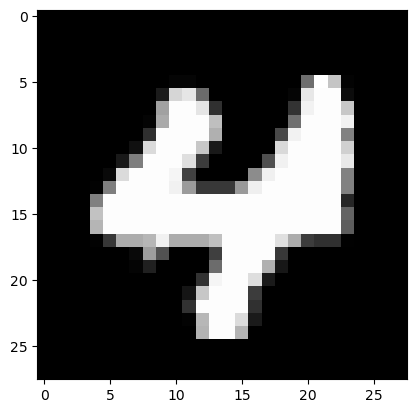

In [5]:
image = train_images[0, :] # first image
image = np.reshape(image, (28, 28))
plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [6]:
bins = np.linspace(start=0, stop=255, num=5) # returns the intervals
print(bins)
x = np.array([154, 2.4, 105.43, 50, 243, 255])
x_to_bins = np.digitize(x, bins)
print(x_to_bins)

[  0.    63.75 127.5  191.25 255.  ]
[3 1 2 1 4 5]


## Ex 1

In [9]:
training_data = np.array([160, 165, 155, 172, 175, 180, 177, 190])
training_labels = np.array([0, 0, 0, 0, 1, 1, 1, 1]) # F = 0, B = 1

# test_data = np.array([178])
# test_label = np.array([1])

# bins = np.array([150, 160, 170, 180, 190])
# x_train = np.digitize(training_data, bins) - 1

# naive_bayes_model = MultinomialNB()
# naive_bayes_model.fit(x_train, training_labels)
# naive_bayes_model.predict(test_data)
# naive_bayes_model.score(test_data, test_labels)

## Ex2

In [11]:
def values_to_bins(mat, bins):
    return np.digitize(mat, bins) - 1

def init(num_bins):
    bins = np.linspace(start=0, stop=256, num=num_bins+1)

    x_train = values_to_bins(train_images, bins)
    x_test = values_to_bins(test_images, bins)
    
    return x_train, x_test

num_bins = 5
x_train, x_test = init(num_bins)
# bins = [0, 63.75, 127.5, 191.25, 256]
# 0 if x < 0
# 1 if 0 <= x < 63.75
# 2 if 63.75 <= x < 127.5
# 3 if 127.5 <= x < 191.25
# 4 if 191.25 <= x < 256
# 5 if 256 <= x 
print(bins)
print(x_train[0, :])
print(x_test)

[150 160 170 180 190]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 2 0 0 0 0
 0 0 0 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 4 4 4 0 0 0 0 0 0 0 4 4 4 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 4 4 4 3 0 0 0 0 0 2 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0
 0 0 4 4 4 4 3 0 0 0 0 1 4 4 4 4 2 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 3 0 0 0
 0 0 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 2 4 4 4 4 1 0 0 0 0 1 4 4 4 4 4 4 0
 0 0 0 0 0 0 0 0 0 4 4 4 4 4 1 0 0 0 0 2 4 4 4 4 4 4 2 0 0 0 0 0 0 0 0 0 2
 4 4 4 4 4 3 1 1 1 2 4 4 4 4 4 4 4 2 0 0 0 0 0 0 0 0 2 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1
 0 0 0 0 0 0 0 0 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 0 0 0 0 0 0 0 0 0
 1 

## Ex3

In [12]:
def train_model(x_train, y_train):
    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(x_train, y_train)
    return naive_bayes_model

num_bins = 4
x_train, x_test = init(num_bins)
naive_bayes_model = train_model(x_train, train_labels)
accuracy = naive_bayes_model.score(x_test, test_labels)
print(f"Accuracy {accuracy * 100:.1f}%")

Accuracy 83.6%


## Ex4

In [8]:
num_bins = [3, 5, 7, 9, 11]
best_accuracy = 0
bin_num_best_accuracy = 5

for num in num_bins:
    x_train, x_test = init(num)
    naive_bayes_model = train_model(x_train, train_labels)
    accuracy = naive_bayes_model.score(x_test, test_labels)
    print(f"Accuracy {accuracy * 100:.1f}% for {num} bins")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        bin_num_best_accuracy = num

print(f"Best accuracy is {accuracy * 100:.1f}% for {bin_num_best_accuracy} bins")

Accuracy 83.0% for 3 bins
Accuracy 83.6% for 5 bins
Accuracy 84.2% for 7 bins
Accuracy 84.2% for 9 bins
Accuracy 84.2% for 11 bins
Best accuracy is 84.2% for 7 bins


## Ex5

This image was classified as 8 but is 5


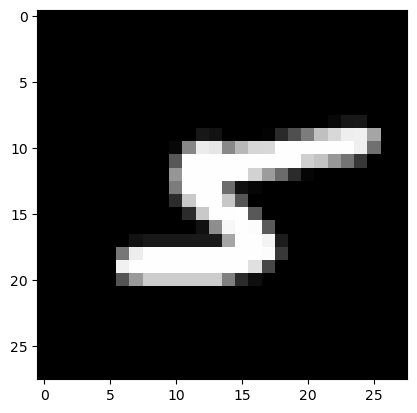

This image was classified as 0 but is 6


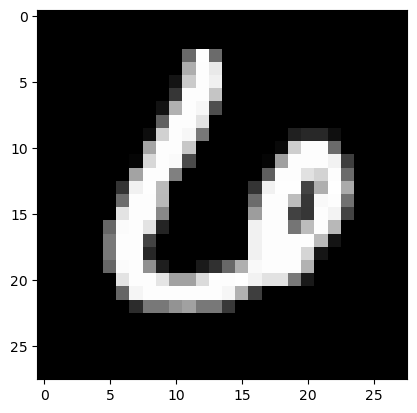

This image was classified as 9 but is 4


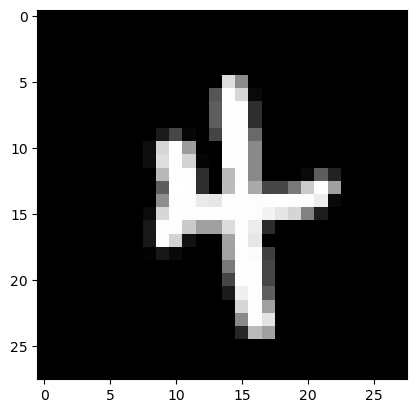

This image was classified as 9 but is 7


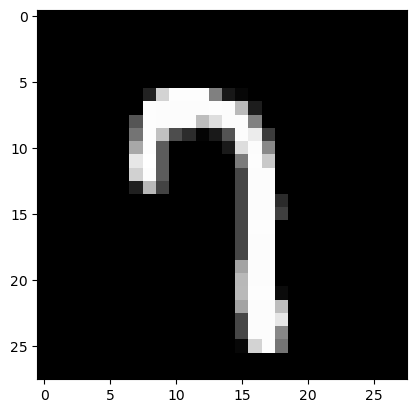

This image was classified as 3 but is 2


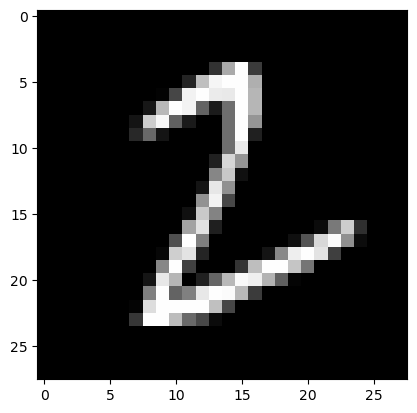

This image was classified as 8 but is 1


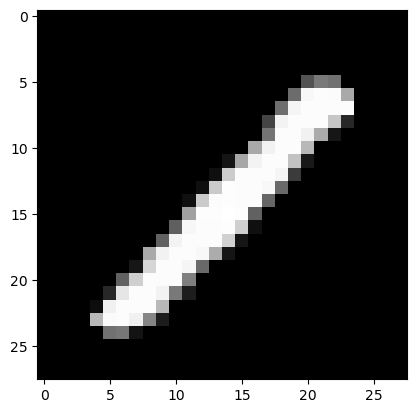

This image was classified as 9 but is 3


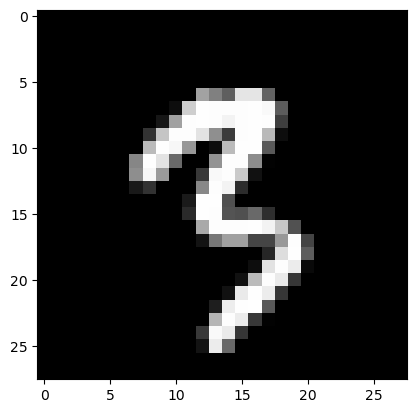

This image was classified as 8 but is 1


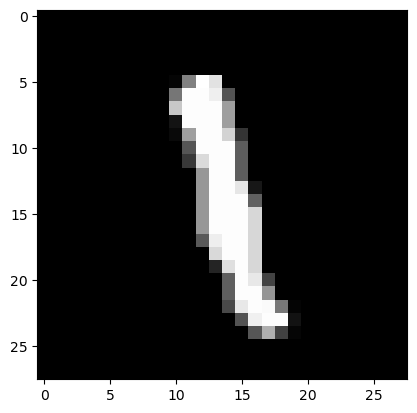

This image was classified as 8 but is 6


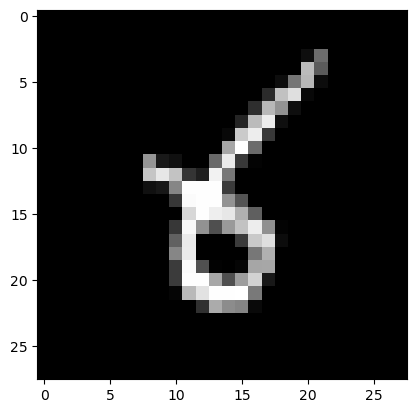

This image was classified as 4 but is 9


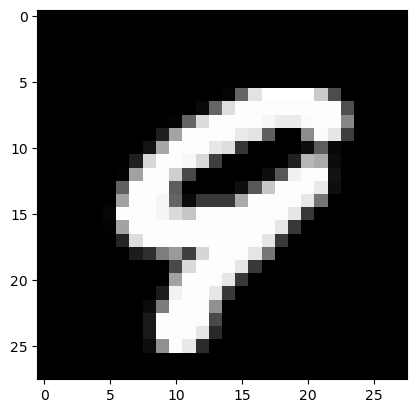

In [13]:
num_bins = 7
x_train, x_test = init(num_bins)
naive_bayes_model = train_model(x_train, train_labels)
predictions = naive_bayes_model.predict(x_test)
misclassified_images = np.where(predictions != test_labels)[0][:10]
# print(misclassified_images)

for idx in misclassified_images:
    img = test_images[idx].reshape(28, 28)
    print(f"This image was classified as {predictions[idx]} but is {test_labels[idx]}")
    plt.imshow(img, cmap='gray')
    plt.show()

## Ex6

[[51.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
 [ 0. 48.  0.  0.  0.  0.  0.  0.  4.  0.]
 [ 2.  0. 51.  1.  1.  0.  1.  1.  1.  0.]
 [ 0.  0.  1. 49.  0.  0.  0.  0.  0.  3.]
 [ 0.  0.  0.  0. 34.  0.  0.  0.  2. 10.]
 [ 1.  0.  0. 10.  0. 33.  1.  0.  6.  1.]
 [ 1.  1.  0.  0.  1.  0. 43.  0.  2.  0.]
 [ 0.  1.  0.  0.  2.  0.  0. 41.  0.  6.]
 [ 0.  1.  3.  3.  1.  1.  1.  1. 34.  1.]
 [ 0.  0.  1.  1.  5.  0.  0.  0.  0. 35.]]


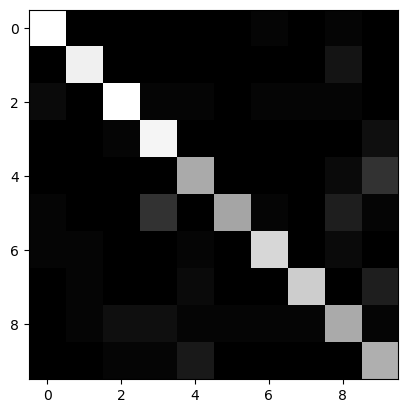

In [15]:
def confusion_matrix(y_true, y_pred):
    n_classes = y_pred.max() + 1
    matrix = np.zeros((n_classes, n_classes))
    
    for idx in range(len(y_true)):
        matrix[y_true[idx], y_pred[idx]] += 1 

    return matrix

num_bins = 5
x_train, x_test = init(num_bins)
naive_bayes_model = train_model(x_train, train_labels)
predictions = naive_bayes_model.predict(x_test)

matrix = confusion_matrix(test_labels, predictions)
print(matrix)

plt.imshow(matrix, cmap='gray')